# HW 1  - Underwater Acoustic Channel Simulation

## By Elisei (Eli) Shafer and Yuri Katz

## Underwater acoustic propagation modeling with arlpy and Bellhop

The underwater acoustic propagation modeling toolbox (`uwapm`) in `arlpy` is integrated with the popular [Bellhop ray tracer](http://oalib.hlsresearch.com/Rays/index.html) distributed as part of the [acoustics toolbox](http://oalib.hlsresearch.com/Modes/AcousticsToolbox/). In this notebook, we see how to use `arlpy.uwapm` to simplify the use of Bellhop for modeling.

In [1]:
import arlpy.uwapm as pm
import arlpy.plot as plt
import numpy as np
from scipy import signal
import matplotlib.pyplot as mplt

In [2]:
pm.models()

['bellhop']

Our soundspeed profile. Sound speed in the Mediterranean Sea: an analysis from a climatological data:

In [3]:
ssp = [
    [0.0,  1527.5], #Sound speed in the Mediterranean Sea: an analysis from a climatological data
    [25.0,  1525.0],
    [50.0,  1520.0],
    [100.0,  1517.5],
    [200.0,  1515.0],
    [300.0,  1515.0],
    [500.0,  1516.0]
]

Now we can create our environment with a transmitter and receiver at 100m depth, 500m apart:

In [4]:
env = pm.create_env2d(
    depth=500.0,
    soundspeed=ssp,
    soundspeed_interp='linear',
#     bottom_soundspeed=1516.0,
    tx_depth=100,
    rx_depth=200,
    rx_range=500,
    frequency=15000
)

Load our environment:

In [5]:
pm.print_env(env)

                name : arlpy
   bottom_absorption : 0.1
      bottom_density : 1600
    bottom_roughness : 0
   bottom_soundspeed : 1600
               depth : 500.0
        depth_interp : linear
           frequency : 15000
           max_angle : 80
           min_angle : -80
            rx_depth : 200
            rx_range : 500
          soundspeed : [[   0.  1527.5]
                        [  25.  1525. ]
                        [  50.  1520. ]
                        [ 100.  1517.5]
                        [ 200.  1515. ]
                        [ 300.  1515. ]
                        [ 500.  1516. ]]
   soundspeed_interp : linear
             surface : None
      surface_interp : linear
            tx_depth : 100
   tx_directionality : None
                type : 2D


Plot our environment:

In [6]:
pm.plot_env(env, width=900)

Plot the soundspeed profile used:

In [7]:
pm.plot_ssp(env)

Eigenrays and also the arrival structure:

In [8]:
rays = pm.compute_eigenrays(env)
pm.plot_rays(rays, env=env, width=900)

Arrivals in dB. i.e. Channel impulse response for 500m:

In [9]:
arrivals = pm.compute_arrivals(env)
pm.plot_arrivals(arrivals, width=900, dB=True)

Move receiver to 550m and plot channel impulse response:

In [11]:
env['rx_range'] = 550
arrivals = pm.compute_arrivals(env)
pm.plot_arrivals(arrivals, width=900, dB=True)

### Generate Chirp Signal and check response of channel:

In [12]:
ir = pm.arrivals_to_impulse_response(arrivals, fs=96000, abs_time=True)

We'll create a chirp signal 10-20 kHz in 1/4 second and then send that signal through the channel:

In [13]:
t = np.linspace(0,1/4,96000/4+1)
chirp = signal.chirp(t,10000,1/4,20000)
ch_resp = signal.fftconvolve(chirp, ir)

/home/elisei/.virtualenvs/dsp3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/home/elisei/.virtualenvs/dsp3.6/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [15]:
%matplotlib notebook

Spectrogram for 500m range channel:

/home/elisei/.virtualenvs/dsp3.6/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


<IPython.core.display.Javascript object>


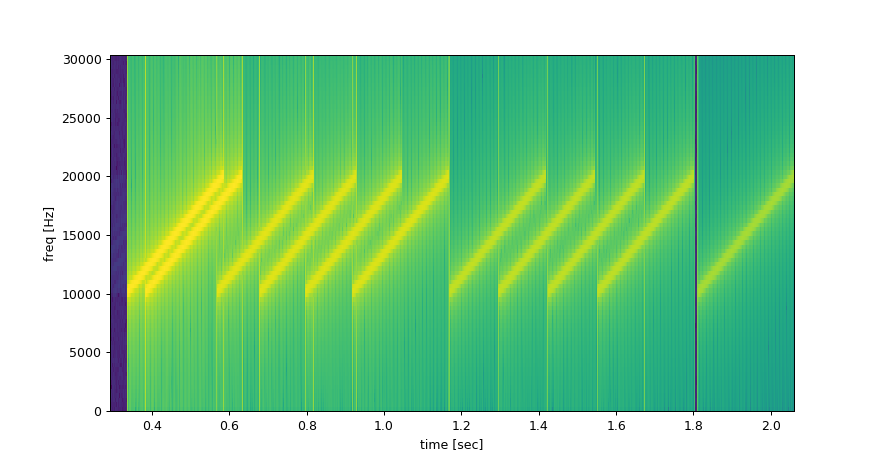

Text(0.5, 0, 'time [sec]')

In [23]:
env['rx_range'] = 500
arrivals = pm.compute_arrivals(env)
ir = pm.arrivals_to_impulse_response(arrivals, fs=96000, abs_time=True)
ch_resp = signal.fftconvolve(chirp, ir)
Pxx, freqs, bins, im = mplt.specgram(ch_resp, Fs=96000,sides='onesided')
mplt.ylabel('freq [Hz]')
mplt.xlabel('time [sec]')

Spectrogram for 550m channel:

/home/elisei/.virtualenvs/dsp3.6/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


<IPython.core.display.Javascript object>


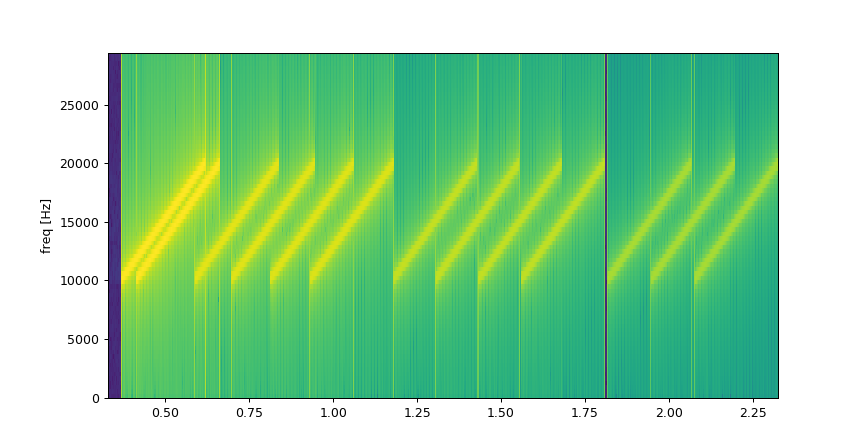

In [21]:
env['rx_range'] = 550
arrivals = pm.compute_arrivals(env)
ir = pm.arrivals_to_impulse_response(arrivals, fs=96000, abs_time=True)
ch_resp = signal.fftconvolve(chirp, ir)
Pxx, freqs, bins, im = mplt.specgram(ch_resp, Fs=96000, sides='onesided')
mplt.ylabel('freq [Hz]')
mplt.xlabel('time [sec]')

# Discussion
For the 500m range channel we observed 11 paths from transmitter to receiver while in the 550m range channel we observed 2 additional paths for a total of 13 paths.
Also it can be seen that there is a longer delay for the 550m range channel due to longer paths.